# ML Model to Predict Loan Application Status

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
#import data
loan_data = pd.read_csv("Loan_Data.csv")

In [5]:
#let's inspect the data
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_data.shape

(614, 13)

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From inpecting the data, we can see that there are null values. Let's verify and drop them.

In [8]:
#check for null values
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#drop null values
loan_data.dropna(inplace = True)

Let's inspect data to verify whether the null values have been dropped or not.

In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [11]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


Let's visualize some of the variables.

In [12]:
#how many males and females are we dealing with?
loan_data["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

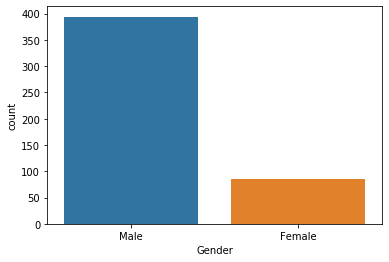

In [13]:
#how many males and females are we dealing with?
sns.countplot(x = loan_data["Gender"])

### We see significantly more male applicants than females.

In [14]:
#how many applicants are married?
loan_data["Married"].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

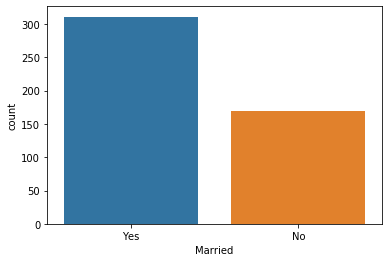

In [15]:
sns.countplot(x = loan_data["Married"])

### There are more married applicants than unmarried applicants.

In [16]:
#Number of dependents the applicants have.
loan_data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

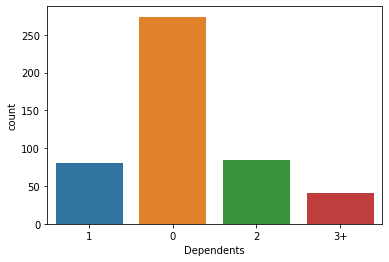

In [17]:
sns.countplot(x = loan_data["Dependents"])

### It can be observed that most of the applicants have no dependents.

In [18]:
#How many applicants are self employed?
loan_data["Self_Employed"].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

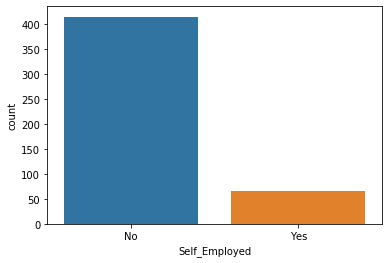

In [19]:
sns.countplot(x = loan_data.Self_Employed)

### We can observe that most of the applicants are employees for others.

In [20]:
#The education level of applicants
loan_data["Education"].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

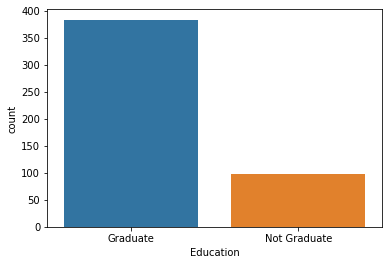

In [21]:
sns.countplot(x = loan_data["Education"])

### Majority of our applicants are graduates.

Bivariate Analysis 

In [22]:
#Let's look at the loan status of each gender
loan_data.groupby(["Loan_Status", "Gender"])["Gender"].value_counts()

Loan_Status  Gender  Gender
N            Female  Female     32
             Male    Male      116
Y            Female  Female     54
             Male    Male      278
Name: Gender, dtype: int64

### Data Preprocessing for ML model

In [23]:
from tqdm.auto import tqdm

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

As observed from the data types, there are categorical values. We need to change them to dummy variables before using them to build the model.

Loan ID has an object data type but it wont be used as a categorical variable to build the model. We need to drop it. 

In [25]:
loan_data.drop("Loan_ID", axis = 1, inplace = True)

In [26]:
col_to_encode = loan_data.select_dtypes(include = "object").columns
col_to_encode

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
label_encoder = LabelEncoder()

for column in tqdm(col_to_encode):
    loan_data[column] = label_encoder.fit_transform(loan_data[column])

Correlation Analysis

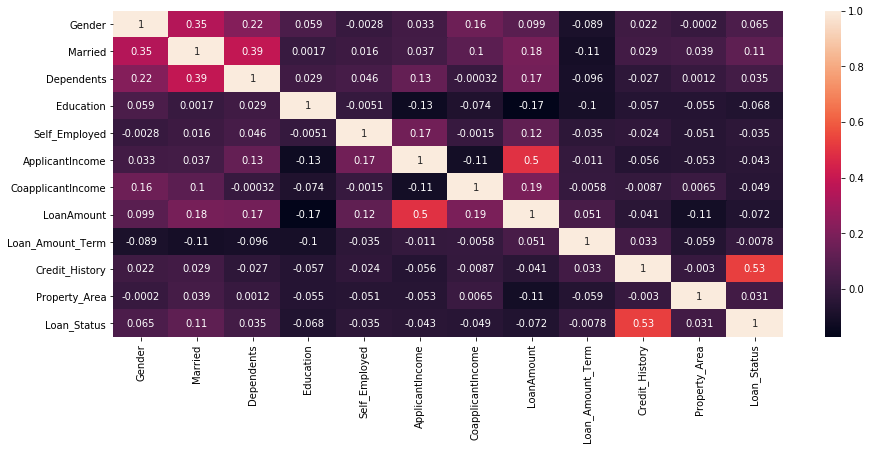

In [28]:
plt.figure(figsize = (15, 6))
sns.heatmap(loan_data.corr(), annot = True)

#### Split Data

In [29]:
X_train = loan_data.drop(columns = "Loan_Status")

In [30]:
y_train = loan_data["Loan_Status"]
y_train.shape

(480,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 23)

In [32]:
print('Train dataset shape:', X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (336, 11)
Test dataset shape (336,)


#### Modeling

In [33]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [34]:
LoanTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction

In [35]:
pred = LoanTree.predict(X_test)

#### compare predicted values to actual values

In [36]:
pred[0:5]

array([1, 1, 1, 1, 0])

In [37]:
y_test[0:5]

121    1
410    0
294    1
540    1
426    0
Name: Loan_Status, dtype: int32

#### Evaluate the model

In [38]:
print("Model's Accuracy: ", accuracy_score(y_test, pred))

Model's Accuracy:  0.7569444444444444


In [39]:
confusion_matrix(y_test, pred)

array([[29, 17],
       [18, 80]], dtype=int64)

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62        46
           1       0.82      0.82      0.82        98

    accuracy                           0.76       144
   macro avg       0.72      0.72      0.72       144
weighted avg       0.76      0.76      0.76       144



### Visulaize the tree

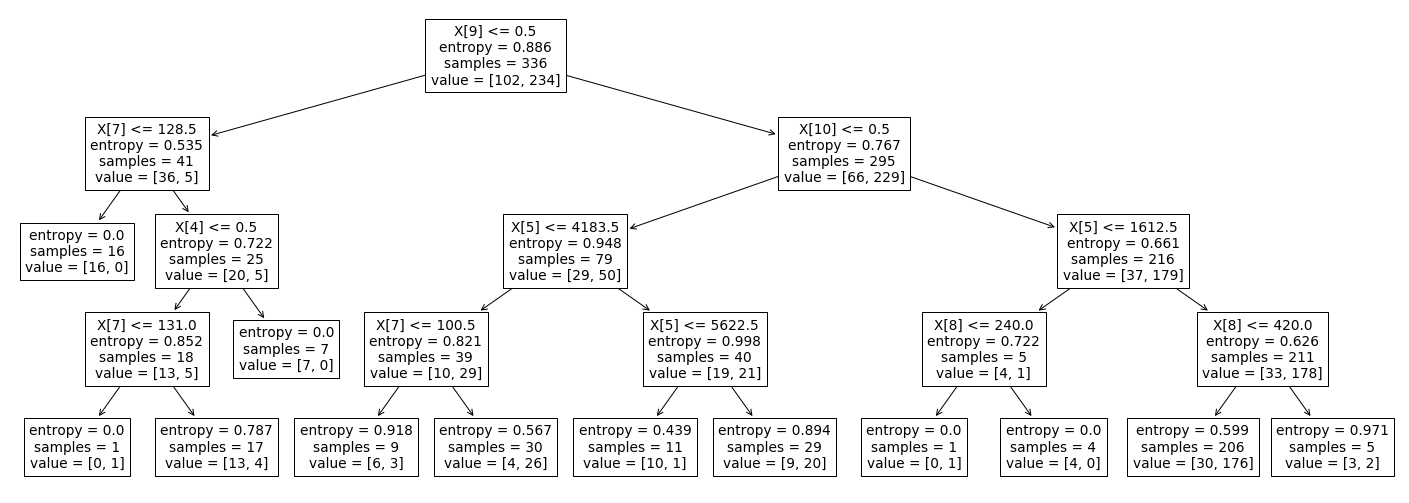

In [41]:
plt.figure(figsize = (25, 9))
tree.plot_tree(LoanTree)
plt.show()